# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# NAIVE BAYES o REDES BAYESIANAS

# DataFrame Vivos

## Importar Librerias

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from  sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sb
#guardar las graficas directamente en el libro
%matplotlib inline

## Importar Datos

In [2]:
# esta base de datos es propia del trabajo en  Sklearn por lo que basta con importarla y almacenarla en una variable
from sklearn import datasets
db_wine = datasets.load_wine()
print(db_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Conversion de los datos en Dataframe

In [3]:
df_wine = pd.DataFrame(db_wine.data, columns=db_wine.feature_names) 
# utiliza pandas para crear el dataframe, los datos de las columnas del dataframe 
#las leera de los datos importados, las columnas seran nombradas como dicta los datos nombrados
df_wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [4]:
df_wine['wine_class'] =db_wine.target # crea una nueva columna cuyos datos sera el target del dataframe previamente creado

In [5]:
df_wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


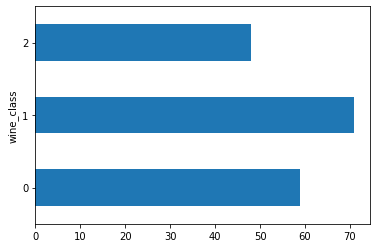

In [6]:
df_wine.groupby('wine_class').size().plot.barh()
#plt.figure(figsize=(5,5))

## Informacion de los datos

In [7]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_class                      0
dtype: int64

In [9]:
df_wine.shape

(178, 14)

In [10]:
df_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
wine_class                        int64
dtype: object

In [11]:
df_wine.min()

alcohol                          11.03
malic_acid                        0.74
ash                               1.36
alcalinity_of_ash                10.60
magnesium                        70.00
total_phenols                     0.98
flavanoids                        0.34
nonflavanoid_phenols              0.13
proanthocyanins                   0.41
color_intensity                   1.28
hue                               0.48
od280/od315_of_diluted_wines      1.27
proline                         278.00
wine_class                        0.00
dtype: float64

In [12]:
df_wine.max()

alcohol                           14.83
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
wine_class                         2.00
dtype: float64

In [13]:
df_wine.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
wine_class                        0.938202
dtype: float64

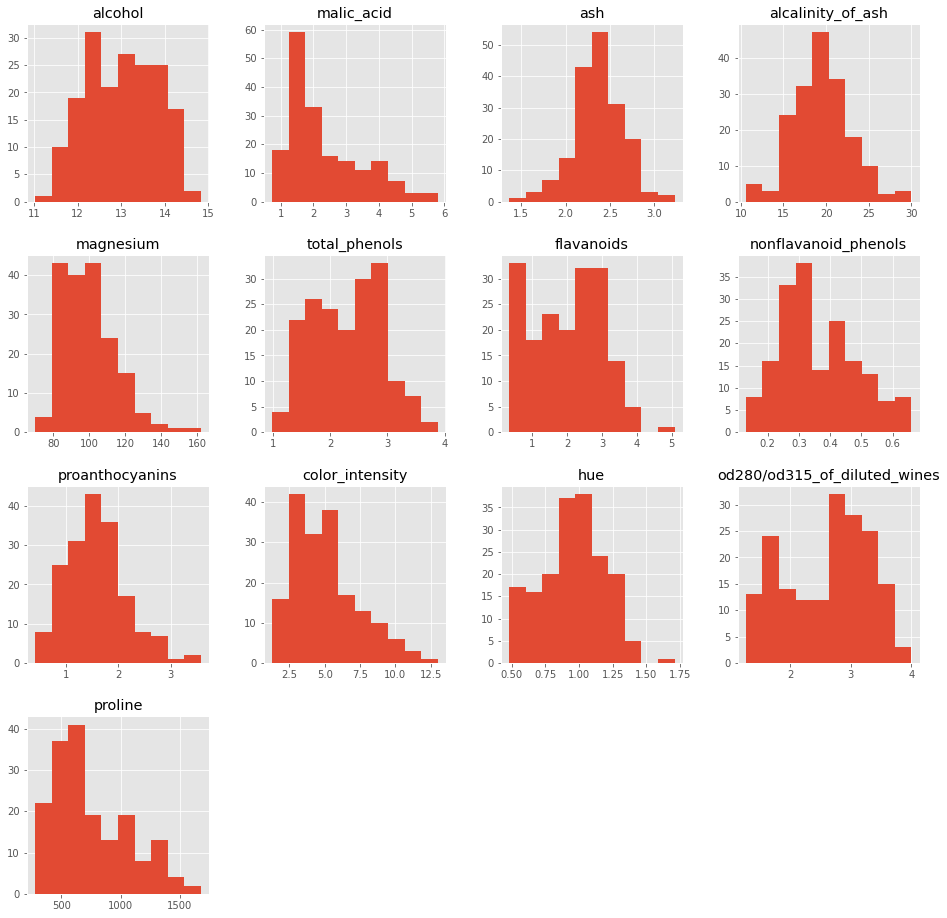

In [16]:
#grafica en histograma todos los datos comprendidos en el dataframe "df_wine" menos la categoria de "wine_class"
plt.rcParams['figure.figsize'] = (16,16)
plt.style.use('ggplot')

df_wine.drop(['wine_class'],1).hist() 
plt.show()

In [17]:
print(df_wine.keys())

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'wine_class'],
      dtype='object')


In [18]:
df_wine.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


In [19]:
"""
graficos de relaciones en pares en el dataset.

hue (como parametro)= variación de colores dependiendo del valor de la variable
Hara un grafico de correlaciones
"""
sb.pairplot(df_wine, hue='wine_class',size=4,vars=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],kind='scatter')


Output hidden; open in https://colab.research.google.com to view.

## Train and Test :v

In [20]:
# se paracion de los datos
X= df_wine.drop('wine_class',axis=1)
Y= df_wine['wine_class']

In [21]:
# separando los datos en train y test 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=109)

In [22]:
# Se instancia el algoritmo y se inicia a entrenar la maquina para predecir resultados

naba_wine = GaussianNB();
naba_wine.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
# Se empieza a realizar predicciones 

Y_pred = naba_wine.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(' Accuracy wine Naive Bayes : '+ str(accuracy*100))

 Accuracy wine Naive Bayes : 90.74074074074075


La anterior prediccion se obtuvo una prediccion con acertacion del 90%, quiza se puede aumentra jugando con el random state y con el test_size. Paraq esto utilizaremos ciclos para asegurar una mejor respuesta ante las diferentes situaciones.

In [24]:
#primero separamos los datos
X= df_wine.drop('wine_class',axis=1)
Y= df_wine['wine_class']

# creamos nuestra variables
# baloto es el valor que aumentara de cero a un limite dado = random_state
# porcentaje es la cantidad dada de datos para entrenamiento y otra para testeo = test_size

baloto, porcentaje = 42, 0.1

# se empieza con un random_state de 42, para asegurar que los datos se revuelvan lo suficiente nada mas comenzar

exacto = int ( input( print("Ingrese un numero de 1 a 100 del valor de exactitud o confiabilidad que quiere de la prediccion: ") ) )

while True:
  baloto = baloto + 1
  print("random_state: "+str(baloto)+" test_size: "+str(porcentaje))
  # separando los datos en train y test 
  X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=porcentaje, random_state=baloto)
  #Instanciamiento
  naba_wine = GaussianNB();
  #Entrenamiento del algoritmo
  naba_wine.fit(X_train,Y_train)
  #Predicciones
  Y_pred = naba_wine.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  confiabilidad  = accuracy*100

  if baloto == 500:
    porcentaje = porcentaje + 0.1
    baloto = 0
  
  elif porcentaje == 0.99:
    print("No se pudo encontrar un valor de test_size y random_state para el grado de confiabilidad requerido")
    break
  
  elif confiabilidad >= exacto:
    print("\n\n\n-------------------------------------------------------------------")
    print("CONFIABILIDAD= "+str(confiabilidad)+
          " \n \n Hallado con los siguientes Parametros: \n Test_size:"
          +str(porcentaje)+" \n Random_state: "+str(baloto))
    print("-------------------------------------------------------------------\n\n\n")
    break


Ingrese un numero de 1 a 100 del valor de exactitud o confiabilidad que quiere de la prediccion: 
100
random_state: 43 test_size: 0.1



-------------------------------------------------------------------
CONFIABILIDAD= 100.0 
 
 Hallado con los siguientes Parametros: 
 Test_size:0.1 
 Random_state: 43
-------------------------------------------------------------------



